# **OBJETIVO**
##### Encontrar a melhor rota possível entre um ponto e outro

### Importações

In [121]:
import networkx as nx
import matplotlib.pyplot as plt

### Função para Criar Mapa

In [122]:
def criar_mapa():
    G = nx.Graph()

    conexoes = [
        ("Centro", "Jardins", 5), ("Centro", "Vila Nova", 8), ("Centro", "Liberdade", 3),
        ("Jardins", "Moema", 7), ("Jardins", "Pinheiros", 4), ("Vila Nova", "Santana", 6),
        ("Santana", "Barra Funda", 9), ("Moema", "Ipiranga", 5), ("Moema", "Brooklin", 6),
        ("Liberdade", "Ipiranga", 4), ("Barra Funda", "Lapa", 5), ("Ipiranga", "Tatuapé", 7),
        ("Butantã", "Pinheiros", 3), ("Brooklin", "Bela Vista", 4), ("Lapa", "Tatuapé", 6),
        ("Bela Vista", "Pinheiros", 5), ("Bela Vista", "Centro", 4), ("Tatuapé", "Alphaville", 10),
        ("Butantã", "Alphaville", 7), ("Alphaville", "Santana", 8)
    ]


    G.add_weighted_edges_from(conexoes)
    return G

### Plotar Mapa

In [123]:
def plotar_mapa(G):
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(8, 6))

    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', edge_color='gray')

    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.title("Mapa de Rotas")
    plt.show()

### Encontra a Melhor Rota

In [124]:
def encontrar_melhor_rota(G, origem, destino):

    try:
        caminho = nx.shortest_path(G, source=origem, target=destino, weight='weight')

        distancia = nx.shortest_path_length(G, source=origem, target=destino, weight='weight')
        return caminho, distancia
    except nx.NetworkXNoPath:
        return None, None

### Plotar Rota

In [125]:
def plotar_rota(G, caminho):
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(8, 6))

    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', edge_color='gray')

    if caminho:
        edges = [(caminho[i], caminho[i+1]) for i in range(len(caminho)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges, width=3, edge_color='red')

    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.title("Melhor Rota Encontrada")
    plt.show()

### Execução

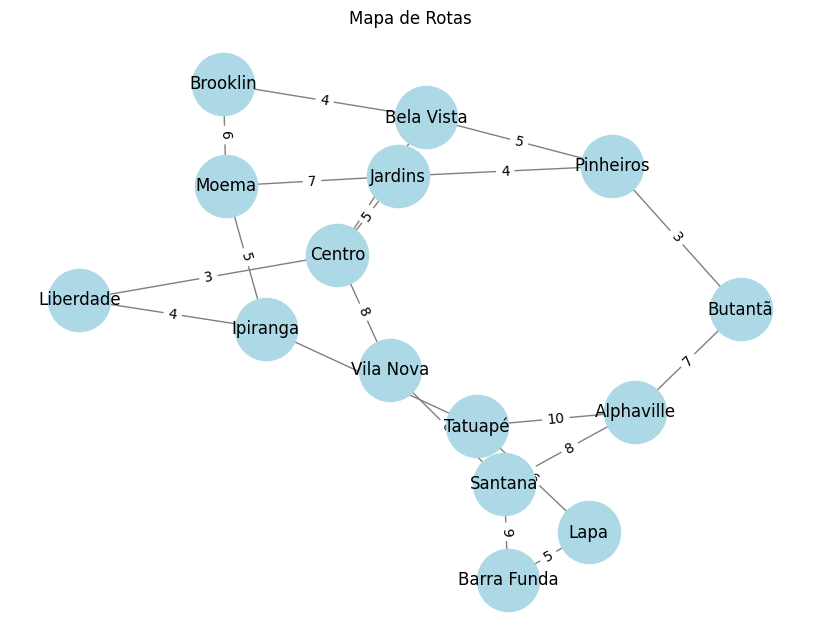

In [126]:
G = criar_mapa()
plotar_mapa(G)

In [127]:
def normalizar_input(texto):
    return texto.strip().title()

origem_input = input("Digite a cidade de origem: ").lower()
destino_input = input("Digite a cidade de destino: ").lower()

origem = normalizar_input(origem_input)
destino = normalizar_input(destino_input)

In [128]:
caminho, distancia = encontrar_melhor_rota(G, origem, destino)

if caminho:
    print(f"Melhor rota de {origem} para {destino}: {caminho}, Distância total: {distancia}")
    plotar_rota(G, caminho)
else:
    print("Não há caminho possível entre os pontos selecionados.")

NodeNotFound: Source  is not in G